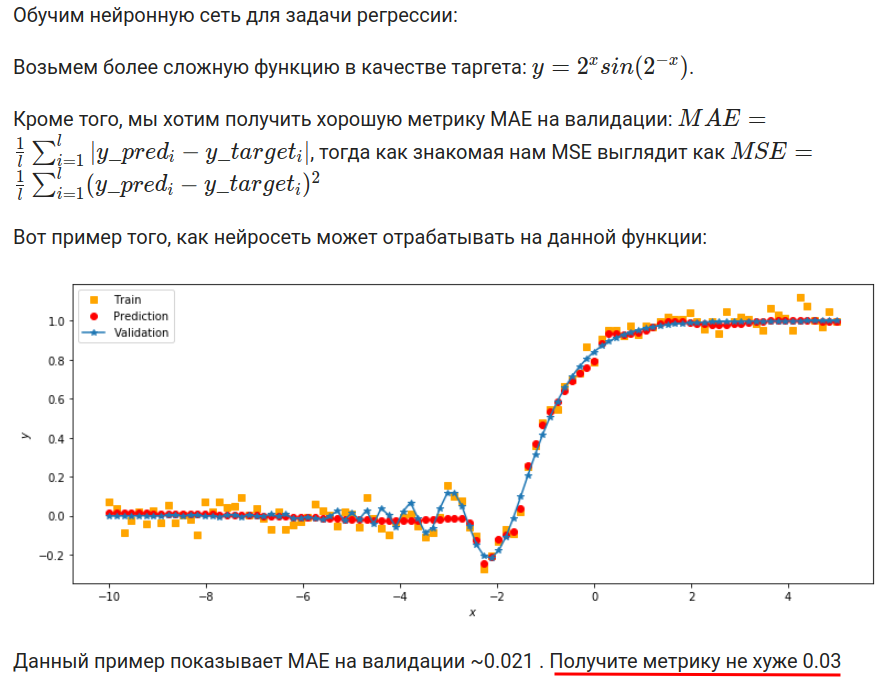

In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# Создание тестовой и валидационной выборки

In [3]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

In [11]:
x_train = torch.linspace(-10, 5,100)
y_train = target_function(x_train)

Text(0.5, 1.0, 'y = 2**x * sin(2**-x)')

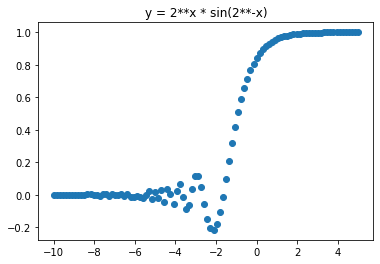

In [12]:
plt.plot(x_train, y_train, 'o')
plt.title('y = 2**x * sin(2**-x)')

Text(0.5, 1.0, 'y = 2**x * sin(2**-x)')

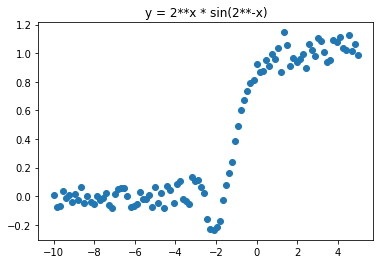

In [13]:
noise = torch.randn(y_train.shape) / 20.
y_train += noise

plt.plot(x_train, y_train, 'o')
plt.title('y = 2**x * sin(2**-x)')

In [15]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[ 8.1275e-03],
        [-7.9051e-02],
        [-6.7560e-02],
        [ 3.6434e-02],
        [-1.2440e-02],
        [ 6.2909e-03],
        [-4.3412e-02],
        [ 1.3092e-02],
        [-2.5063e-02],
        [ 6.7590e-02],
        [-5.0575e-02],
        [ 3.4413e-04],
        [-3.8890e-02],
        [-5.6660e-02],
        [-1.4275e-05],
        [-2.6887e-02],
        [-1.5623e-02],
        [ 2.3002e-02],
        [-5.9246e-02],
        [-8.2380e-02],
        [ 1.4397e-02],
        [ 5.3199e-02],
        [ 5.6055e-02],
        [ 5.7955e-02],
        [ 2.5527e-03],
        [-7.7563e-02],
        [-6.8903e-02],
        [-5.7519e-02],
        [ 3.2115e-02],
        [-1.9701e-02],
        [-1.7744e-02],
        [ 1.0932e-02],
        [-7.5463e-02],
        [ 6.2249e-02],
        [-4.8018e-02],
        [ 2.1524e-02],
        [-8.2985e-02],
        [ 6.8131e-02],
        [ 4.4410e-02],
        [-5.0772e-02],
        [ 8.5432e-02],
        [ 1.0478e-01],
        [-2.3061e-02],
        [-3

In [17]:
x_train.shape

torch.Size([100, 1])

In [19]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.2003e-04],
        [ 2.6802e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9868e-03],
        [-4.1531e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4946e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5003e-03],
        [-1.1817e-02],
        [-2.0529e-02],
        [-2.9806e-03],
        [ 2.4776e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9170e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3339e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

# Модель

In [146]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_neurons, 20)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(20, 30)
        self.act3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(30, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        
        return x
        

model = RegressionNet(4)

In [147]:
def loss(pred, target):
    mod = torch.abs(pred - target)
    return mod.mean()

In [148]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)



In [149]:
optimizer = torch.optim.Adamax(model.parameters(), lr=0.01)

for epoch in range(500):
    optimizer.zero_grad()
    
    y_pred = model.forward(x_train)
    
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    
    optimizer.step()

print(loss(model.forward(x_validation), y_validation).item())

0.026749396696686745
